In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [5]:
city = pd.read_csv('cost-of-living.csv')

In [6]:
city.shape

(55, 161)

In [7]:
city.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [8]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Saint Petersburg, Russia")

In [9]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 59.9606739, Longitude = 30.1586551


In [10]:
city = city.T
city.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0


In [11]:
city.rename(columns=city.iloc[0], inplace = True)
city.drop(city.index[0], inplace = True)
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [12]:
city = city.reset_index()

# lets rename the index column to location
city = city.rename(columns={'index': 'Location'})
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [13]:
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [14]:
import warnings
warnings.filterwarnings('ignore')

# It can be time consuming
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
city['location'] = city['Location'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
city['point'] = city['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns
city[['latitude', 'longitude', 'altitude']] = pd.DataFrame(city['point'].tolist(), index=city.index)

# lets check the head of the data set
city.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Athens, Greece',), **{}).
Traceback (most recent call last):
  File "c:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "c:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 292, in _read_status
    

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.48,7.18,19305.29,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.9606739, 30.1586551, 0.0)",59.960674,30.158655,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.62,9.73,20874.72,282.94,6905.43,"(İstanbul, Marmara Bölgesi, Türkiye, (41.07660...","(41.0766019, 29.052495, 0.0)",41.076602,29.052495,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.58,8.61,20898.83,212.18,4948.41,"(İzmir, Ege Bölgesi, Türkiye, (38.23166, 27.02...","(38.23166, 27.02997, 0.0)",38.231660,27.029970,0.0
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,1.25,12.34,24402.77,351.6,1641.0,"(Helsinki, Helsingin seutukunta, Uusimaa, Mann...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.59,5.37,17238.13,210.52,2679.3,"(Chișinău, Municipiul Chișinău, Moldova, (47.0...","(47.0245117, 28.8322923, 0.0)",47.024512,28.832292,0.0


In [15]:
# lets remove some unnecessary columns from the data
city = city.drop(['location','point','altitude'], axis = 1)

# lets check the column names again
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [16]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(city):
    return int(round((city[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [17]:
city['Food'] = city.apply(food, axis = 1)
city['Travel'] = city.apply(travel, axis = 1)
city['Living'] = city.apply(living, axis = 1)
city['Lifestyle'] = city.apply(lifestyle, axis = 1)
city['Education'] = city.apply(education, axis = 1)
city['Income'] = city.apply(income, axis = 1)

In [18]:
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,411.83,5388.86,59.960674,30.158655,2,8,5020,34,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,282.94,6905.43,41.076602,29.052495,2,6,5409,23,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,212.18,4948.41,38.231660,27.029970,2,5,5297,19,2580,207
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,351.6,1641.0,60.167488,24.942747,4,20,6985,44,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148


In [19]:
# lets split the location to fetch the country names
city['Location'].str.split(', ')[0]

['Saint Petersburg', 'Russia']

In [20]:
# lets apply the same function on whole dataset
city['country'] = city['Location'].str.split(', ')

# lets store the second one in the country column
city['Country'] = city['country'].apply(lambda x: x[1])

#lets check the values in the country column
city['Country'].value_counts()

Country
India          11
Canada          8
Poland          6
Australia       5
Romania         5
               ..
Armenia         1
Philippines     1
Indonesia       1
Belgium         1
Ecuador         1
Name: count, Length: 90, dtype: int64

In [21]:
## lets groupby the Countries with Lifestyle Factors

city[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

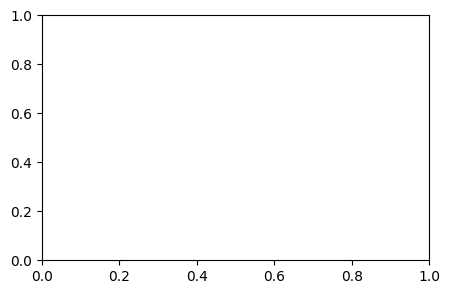

In [ ]:
# Let's check out the Top 5 Most Expensive Countries for Food
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = False).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = False).head(6)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = False).head(5)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = False).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()